In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Dataset/Air_Traffic_Cargo_Statistics.csv")
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
10336,201001,EVA Airways,BR,EVA Airways,BR,International,Asia,Enplaned,Cargo,Freighter,292602,132.724
28836,201808,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Enplaned,Express,Passenger,18956,8.598
9777,200910,Federal Express,FX,Federal Express,FX,Domestic,US,Deplaned,Cargo,Freighter,7090754,3216.366
16535,201211,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,75133,34.080
4058,200704,Federal Express,FX,Federal Express,FX,Domestic,US,Deplaned,Cargo,Freighter,9033458,4097.577


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35599 entries, 0 to 35598
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              35599 non-null  int64  
 1   Operating Airline            35599 non-null  object 
 2   Operating Airline IATA Code  35545 non-null  object 
 3   Published Airline            35599 non-null  object 
 4   Published Airline IATA Code  35545 non-null  object 
 5   GEO Summary                  35599 non-null  object 
 6   GEO Region                   35599 non-null  object 
 7   Activity Type Code           35599 non-null  object 
 8   Cargo Type Code              35599 non-null  object 
 9   Cargo Aircraft Type          35599 non-null  object 
 10  Cargo Weight LBS             35599 non-null  int64  
 11  Cargo Metric TONS            35599 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.3+ MB


In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Weight LBS                0
Cargo Metric TONS               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [38]:
titlefont = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

lablefont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

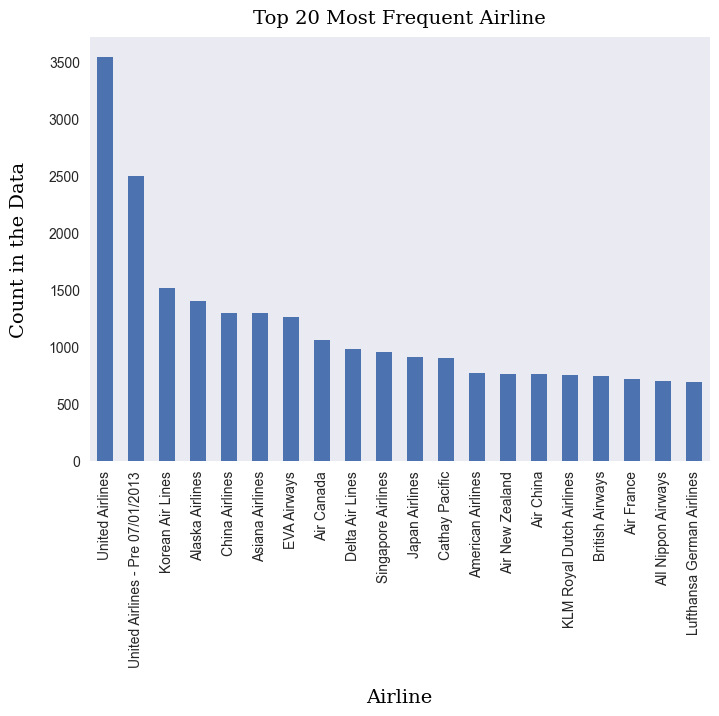

In [47]:
import matplotlib.pyplot as plt
df['Operating Airline'].value_counts().sort_values(ascending= False)[:20].plot(kind= "bar")
plt.title("Top 20 Most Frequent Airline" , fontdict= lablefont , pad = 10)
plt.xlabel("Airline" , fontdict= lablefont , labelpad= 15)
plt.ylabel("Count in the Data" , fontdict=lablefont ,  labelpad=15)
plt.grid(False)

In [7]:
# Total Unique Airlines in the data
df['Operating Airline'].value_counts().count()

97

<Axes: >

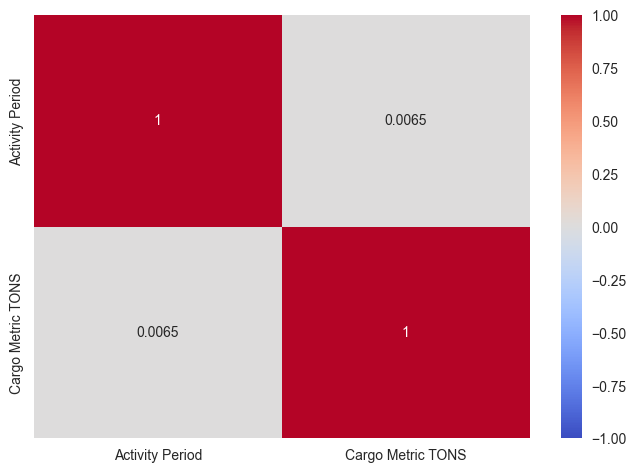

In [48]:
# df['Cargo Metric TONS'] and df['Cargo Weight LBS'] are same 
import seaborn as sns
heat_map = df.select_dtypes("number").corr()
sns.heatmap(heat_map, vmax=1 , vmin= -1 , cmap= "coolwarm" , annot= True)

<Axes: >

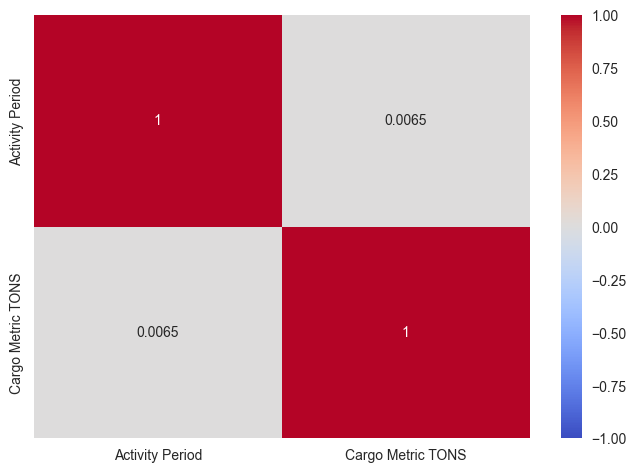

In [51]:
import seaborn as sns
heat_map = df.select_dtypes("number").corr()
sns.heatmap(heat_map , vmin= -1 , vmax= 1 , annot= True , cmap= "coolwarm")

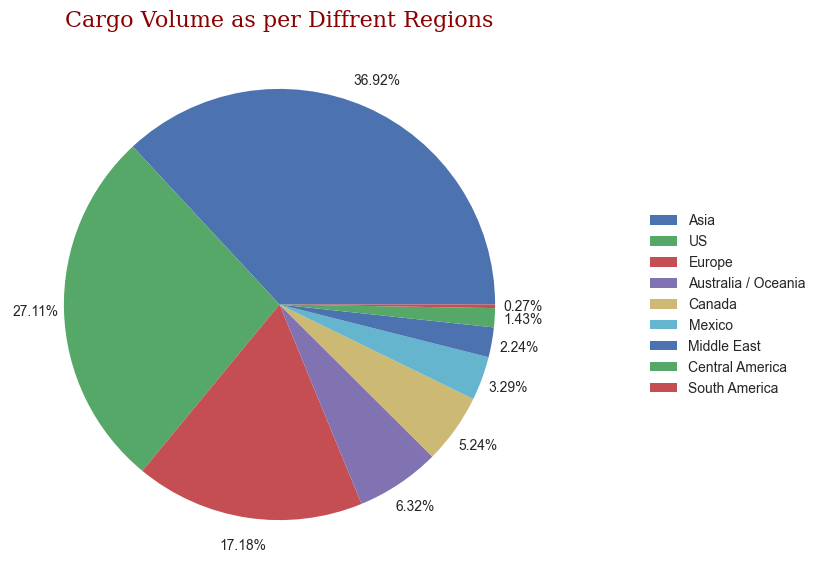

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15 ,7))
plt.title("Cargo Volume as per Diffrent Regions" , fontdict= titlefont , loc = "center")
df['GEO Region'].value_counts()
plt.pie(df['GEO Region'].value_counts() , autopct="%.2f%%" , pctdistance= 1.13,  labeldistance=1.25)
plt.legend(df["GEO Region"].value_counts().index , bbox_to_anchor = (1.5, 0.5) , loc = "center right")
plt.show()

In [11]:
df.describe()

,Activity Period,Cargo Metric TONS
count,35599.000000,35599.000000
mean,201311.369449,217.687856
std,473.480500,431.363548
min,200507.000000,0.000000
25%,200905.000000,8.344500
50%,201307.000000,60.309000
75%,201709.000000,248.106000
max,202109.000000,10801.278000


In [12]:
# How many planes as zero cargo and why
zero_cargo = df[df['Cargo Metric TONS'] == 0.0]
zero_cargo.count()

Activity Period                32
Operating Airline              32
Operating Airline IATA Code    32
Published Airline              32
Published Airline IATA Code    32
GEO Summary                    32
GEO Region                     32
Activity Type Code             32
Cargo Type Code                32
Cargo Aircraft Type            32
Cargo Metric TONS              32
dtype: int64

In [13]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
34746,202105,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Cargo,Passenger,53.061
1689,200603,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Deplaned,Mail,Passenger,7.620
1801,200604,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Cargo,Passenger,291.215
6924,200807,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Mail,Passenger,18.868
22609,201511,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Enplaned,Cargo,Passenger,147.454


In [14]:
# 1. Is Operating Airline and Published Airline the same thing? --> Nope
df[df['Operating Airline'] != df['Published Airline']]['Activity Period'].count()

963

In [55]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

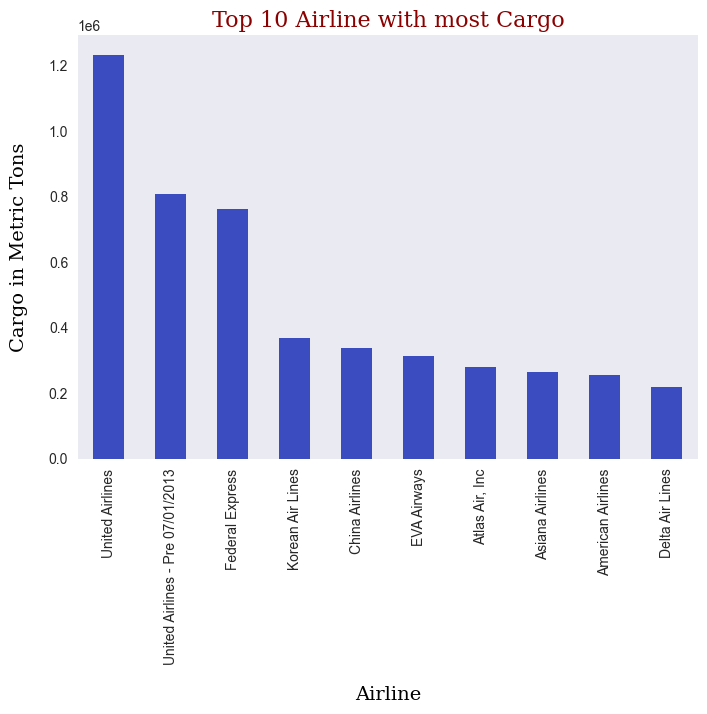

In [ ]:
# 2. Which airline has handled the most cargo metric tons overall?
plt.style.use("seaborn-v0_8")
df.groupby("Operating Airline")["Cargo Metric TONS"].sum().sort_values(ascending= False)[:10].plot(kind= "bar" , colormap="coolwarm")
plt.title("Top 10 Airline with most Cargo" , fontdict= titlefont)
plt.ylabel("Cargo in Metric Tons" , labelpad= 15 , fontdict= lablefont)
plt.xlabel("Airline" ,  fontdict= lablefont , labelpad=15)
plt.grid(False)
plt.show()

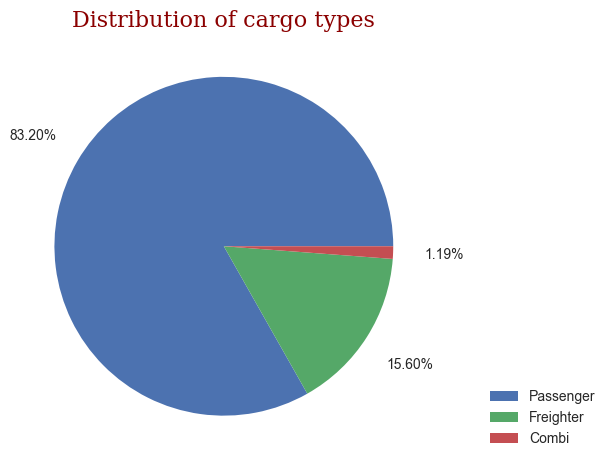

In [62]:
# 3. What is the distribution of cargo types (Express, Mail, Cargo)?
cargo_type = df['Cargo Aircraft Type'].value_counts()
plt.pie(cargo_type , autopct= "%.2f%%", pctdistance=1.3)
plt.legend(cargo_type.index, loc = "lower left", bbox_to_anchor = (1.1 , 0))
plt.title("Distribution of cargo types" , fontdict= titlefont , loc= "center")
plt.show()

In [18]:
df.sample()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
22586,201511,Compass Airlines,CP,American Airlines,AA,Domestic,US,Enplaned,Mail,Passenger,1.715


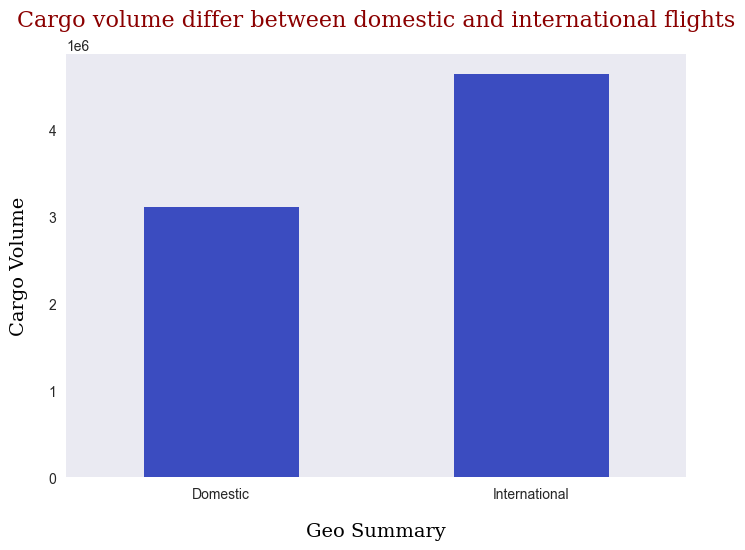

In [ ]:
# 4. How does cargo volume differ between domestic and international flights?
df.groupby("GEO Summary")['Cargo Metric TONS'].sum().plot(kind= "bar" , colormap= "coolwarm")
plt.title("Cargo volume differ between domestic and international flights", fontdict= titlefont , pad= 20)
plt.ylabel("Cargo Volume" , labelpad= 15 , fontdict= lablefont)
plt.xticks(rotation = 0)
plt.xlabel("Geo Summary" , labelpad= 15 , fontdict= lablefont)
plt.grid(False)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35599 entries, 0 to 35598
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              35599 non-null  int64  
 1   Operating Airline            35599 non-null  object 
 2   Operating Airline IATA Code  35545 non-null  object 
 3   Published Airline            35599 non-null  object 
 4   Published Airline IATA Code  35545 non-null  object 
 5   GEO Summary                  35599 non-null  object 
 6   GEO Region                   35599 non-null  object 
 7   Activity Type Code           35599 non-null  object 
 8   Cargo Type Code              35599 non-null  object 
 9   Cargo Aircraft Type          35599 non-null  object 
 10  Cargo Metric TONS            35599 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 3.0+ MB


Text(0.5, 0, 'Cargo Metric TONS')

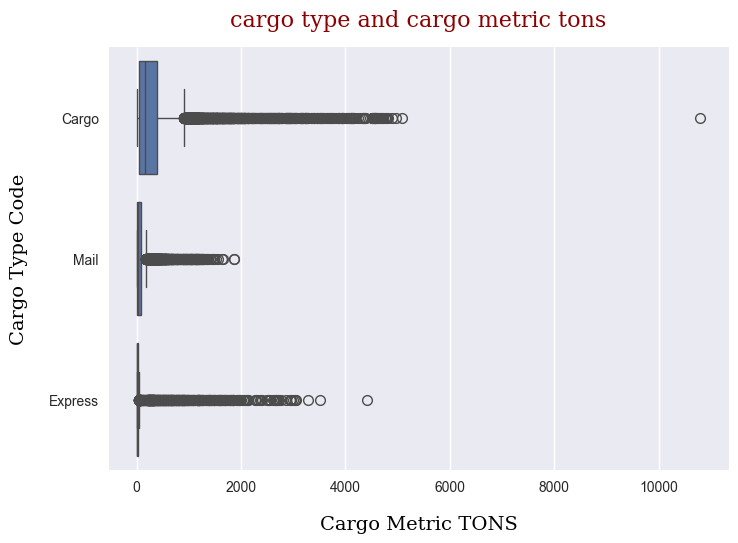

In [76]:
# What is the relationship between cargo type and cargo metric tons?
df["Cargo Type Code"].value_counts()
sns.boxplot(data= df , y = "Cargo Type Code" , x = "Cargo Metric TONS")
plt.title("cargo type and cargo metric tons" , fontdict= titlefont , pad = 15)
plt.ylabel("Cargo Type Code" , fontdict= lablefont , labelpad= 15)
plt.xlabel("Cargo Metric TONS" , fontdict= lablefont , labelpad= 15)